# Winter 2022 Data Science Intern Challenge 

*Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!*


### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 



1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.   What metric would you report for this dataset?
3.   What is its value?

### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?





### Import Necessary library and read data from local

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

### Get first look of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
data.isna().count()

order_id          5000
shop_id           5000
user_id           5000
order_amount      5000
total_items       5000
payment_method    5000
created_at        5000
dtype: int64

After checking the data, we could see there is no missing value in our dataset, since all columns have 5000 count as False when count NaN value.

In [6]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The min order_amount is 90, median value is 284(compared  with mean value 3145, the difference is huge, 75% of order_amount is equal or under 390, and total_items is equal or under 3. As a result there might be some orders are extremly big to make this happen).

The Standard Deviation of order_amout is 41282.54 ,and Standard Deviation of total_items is 116.32. This is relatively greater than the mean.

We also notice that the Max of oder_amount is 70400(with total items for 2000), this is unusual order, so there might be some outliers in our dataset to make the Average Of Order to 3145.13.


### Outlier Detection

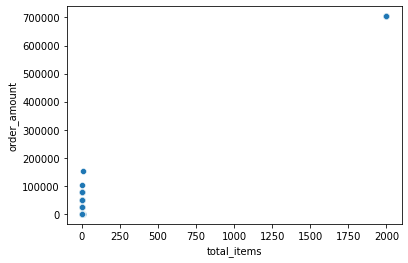

In [11]:
sns.scatterplot(data=data, y="order_amount",x="total_items")

In [20]:
data['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

We could verify that most of our orders are in the left bottom corner, those outliers have high order_amount are in the top right.

For total_items = 2000, there are 17 orders, here we detect them as ourliers.

Next we want see how total_items affect the order_amount, which means is there any obivious difference in item price.

First we create a new column named "order_per_item_price"


In [13]:
data['order_per_item_price'] = data['order_amount']/data['total_items']
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_per_item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


Then we need to see if there is any very expensive sneakers?

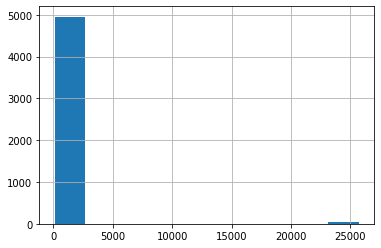

In [15]:
data['order_per_item_price'].hist()

In [16]:
data['order_per_item_price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: order_per_item_price, dtype: float64

Most of our order_per_item_price fall in the first bin, but we do detect some ourliers which fall in to very expensive zone.

The mean is 387, and median is 153, std is 2441 which is relatively high to the mean.

In [26]:
(data['order_per_item_price'] <= 500).value_counts()

True     4954
False      46
Name: order_per_item_price, dtype: int64

In [27]:
(data['order_per_item_price'] <= 5000).value_counts()

True     4954
False      46
Name: order_per_item_price, dtype: int64

We quick check that no matter we that the threshold to 500 or 5000, we got same result, so we can use 500 as the threshold to filtering outliers.

### Filtering Outliers:

Let us try to remove ourliers which has large total_items < 2000  and high order_per_item_price < 500  and calculate the AOV.

In [36]:
data.loc[ (data['total_items'] < 2000) & (data['order_per_item_price'] < 500) ].describe()

,order_id,shop_id,user_id,order_amount,total_items,order_per_item_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


After removing these outliers, we could get a normal AOV for order_amount at 302.58, std is 160.80, which makes more sense.

### Categorize and Report

But still we miss the information for outliers, so we need to consider them into our report and categorize them into different groups. Also we need to report the AOV_per_item along with AOV to better understand our custoemrs.


1. We group total_items > 2000 customers as wholesale, other customers as retail.
2. We group order_per_item_price < 500 as normal sneaker orders,  >= 500 as expensive sneaker orders.
3. We create two new cols, named purchase_type(wholesale,retail) and sneaker_type(expensive,normal)

This process could help us make easier filtering later.



In [43]:
data['purchase_type'] = np.nan
data['sneaker_type'] = np.nan
data['purchase_type'].loc[data['total_items'] < 2000] = 'retail'
data['purchase_type'].loc[data['total_items'] >= 2000] = 'wholesale'
data['sneaker_type'].loc[data['order_per_item_price'] < 500] = 'normal'
data['sneaker_type'].loc[data['order_per_item_price'] >= 500] = 'expensive'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [46]:
pd.pivot_table(data, values=['order_amount','order_per_item_price'], index=['purchase_type'],
                    columns=['sneaker_type'], aggfunc=np.mean)

order_amount                order_per_item_price            
sneaker_type      expensive         normal            expensive      normal
purchase_type                                                              
retail         49213.043478     302.580514              25725.0  151.788536
wholesale               NaN  704000.000000                  NaN  352.000000

# Conclusion.
The Pivot table could help us identify AOV and AOV_per_item for different group of customers.

We could found wholesale customer and who bought expensive sneakers are different groups. 

For **Retail customers**, normal sneakers buyers spend 302.58 average per order, and average sneaker price per order is 151.79.
Expensive sneakers buyers spend 49213.04 average per order, and average item price per order is 25725.


For **Wholesale customers**, they only buy normal sneakers, they spend 704000 per order. The average item per order is 352.



# Question 2: 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.



1. How many orders were shipped by Speedy Express in total?

In [ ]:
%%sql 
SELECT ShipperName, COUNT(Orders.OrderID)
FROM Orders
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName == 'Speedy Express'
GROUP BY Orders.ShipperID

ANSWER: 54 orders were shipped by Speedy Express

2. What is the last name of the employee with the most orders?




In [ ]:
%%sql 
SELECT LastName, COUNT(Orders.EmployeeID)
FROM Orders
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY LastName
ORDER BY COUNT(Orders.EmployeeID) DESC LIMIT 3;

ANSWER: Peacock is the last name of the employee with most orders.

3. What product was ordered the most by customers in Germany?

In [ ]:
# Not considering quantity of the order
%%sql 
SELECT Products.ProductName as Product_Name, COUNT(Orders.OrderID) as OrderCount
FROM Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID
INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
INNER JOIN Products ON Products.ProductID=OrderDetails.ProductID
WHERE Country = 'Germany'
GROUP BY Product_Name
ORDER BY COUNT(Orders.OrderID) DESC LIMIT 3



ANSWER: If only considering the order count, 'Gorgonzola Telino' was ordered the most by customers in Germany, there are 5 orders.

In [ ]:
# Considering quantity of the order
%%sql
SELECT Products.ProductName as Product_Name, SUM(OrderDetails.Quantity) as Total_Quantity
FROM Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID
INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
INNER JOIN Products ON Products.ProductID=OrderDetails.ProductID
WHERE Country = 'Germany'
GROUP BY Product_Name
ORDER BY Total_Quantity Desc LIMIT 3

If considering the quantity of every order, 'Boston Crab Meat' was ordered the most by customers in Germany with the quantity of 160.